In [1]:
import sys
import os
import glob
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.extend((0, ".."))
import RRE_utils as ut
import SNIDsn

import squarify

In [2]:
df = pd.read_csv("../metadataset.csv", index_col=0)
df

,Nspec,Nbins,WvlStart,WvlEnd,SplineKnots,SN,dm15,TypeStr,TypeInt,SubTypeInt,WFF subtype int,WFF subtype str,WFF broadtype int,WFF broadtype str
0,60,1024,2500.0,10000.0,11,sn2003du,1.07,Ia-norm,1,2,0,Ia-norm,0,Ia
1,15,1024,2500.0,10000.0,8,sn2003it,1.36,Ia-norm,1,2,0,Ia-norm,0,Ia
2,5,1024,2500.0,10000.0,10,sn2000er,-9.99,Ibn,2,5,7,Ibn,1,Ib
3,8,1024,2500.0,10000.0,8,sn2001N,-9.99,Ia-norm,1,2,0,Ia-norm,0,Ia
4,10,1024,2500.0,10000.0,10,sn2007qe,1.03,Ia-norm,1,2,0,Ia-norm,0,Ia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,9,1024,2500.0,10000.0,8,sn1998V,0.99,Ia-norm,1,2,0,Ia-norm,0,Ia
517,1,1024,2500.0,10000.0,8,sn2006cq,-9.99,Ia-norm,1,2,0,Ia-norm,0,Ia
518,10,1024,2500.0,10000.0,8,sn2005ke,1.82,Ia-91bg,1,4,2,Ia-91bg,0,Ia
519,2,1024,2500.0,10000.0,11,sn00dg,-9.99,Ia-norm,1,2,0,Ia-norm,0,Ia


In [3]:
cols = [
    "WFF subtype int", "WFF broadtype int", "Nspec"
]


nSubtypes = np.zeros(17, dtype=int)
nBroadtypes = np.zeros(4, dtype=int)

nSpecSubtypes = np.zeros(17, dtype=int)
nSpecBroadtypes = np.zeros(4, dtype=int)

for row in df[cols].values:
    nSubtypes[row[0]] += 1
    nBroadtypes[row[1]] += 1

    nSpecSubtypes[row[0]] += row[2]
    nSpecBroadtypes[row[1]] += row[2]

In [4]:
nSubtypes, nBroadtypes

(array([322,  36,  44,   2,   6,   7,  22,   3,  19,   2,  21,  24,   2,
          6,   2,   2,   1]),
 array([417,  46,  47,  11]))

In [5]:
nSubtypes.sum(), nBroadtypes.sum()

(521, 521)

In [6]:
nSpecSubtypes, nSpecBroadtypes

(array([2380,  390,  264,   27,   64,  141,  270,   31,  328,   15,  263,
         279,   33,  176,   13,   64,  241]),
 array([3266,  644,  575,  494]))

In [7]:
nSpecSubtypes.sum(), nSpecBroadtypes.sum()

(4979, 4979)

In [8]:
nSpecSubtypes / nSpecSubtypes.sum(), nSpecBroadtypes / nSpecBroadtypes.sum()

(array([0.47800763, 0.07832898, 0.0530227 , 0.00542278, 0.01285399,
        0.02831894, 0.05422776, 0.00622615, 0.06587668, 0.00301265,
        0.05282185, 0.05603535, 0.00662784, 0.03534846, 0.00261097,
        0.01285399, 0.04840329]),
 array([0.65595501, 0.12934324, 0.11548504, 0.09921671]))

In [9]:
colors = [
    "#0080ff",
    "#1380ec",
    "#2680d9",
    "#3980c6",
    "#4d80b3",
    "#60809f",
    
    "#ff8000",
    "#ec8013",
    "#d98026",
    "#c68039",
    
    "#ff00ff",
    "#ec13ec",
    "#d926d9",
    
    "#00ff00",
    "#13ec13",
    "#26d926",
    "#39c639"
]

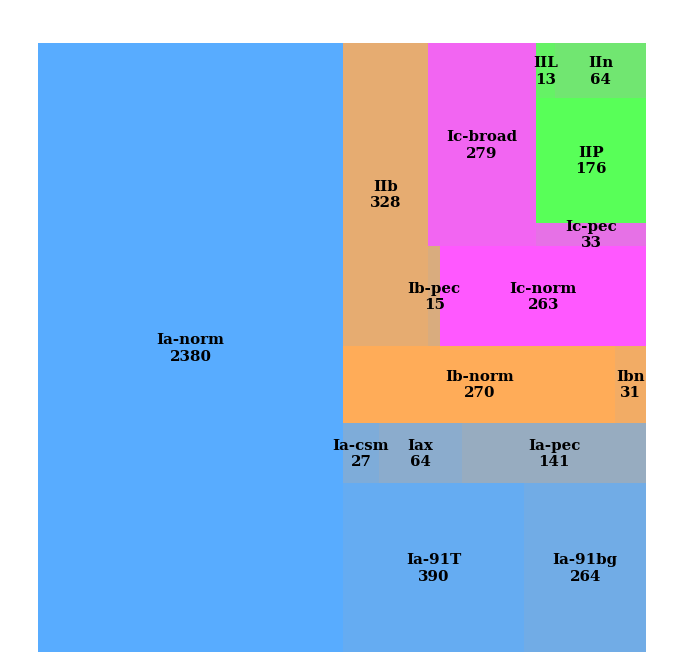

In [10]:
labels = [sn + f"\n{N}" for sn, N in zip(ut.SNtypes_str, nSpecSubtypes)]

plt.figure(figsize=(12, 12))
squarify.plot(
    sizes=nSpecSubtypes[:-1],
    label=labels[:-1],
    alpha=0.65,
    color=colors[:-1],
    text_kwargs={"fontsize": 15, "fontfamily": "serif", "weight": "bold"}
).set()

plt.axis('equal')
plt.axis("off")
plt.savefig("treemap.pdf", bbox_inches='tight', pad_inches=0)
plt.show()